In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## Examples

### **チャレンジ 1: 国ごとの死亡者数を可視化**
- **内容**: 指定した国の災害データを使用し、災害タイプごとの死亡者数を棒グラフで可視化する関数を作成してください。

### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。



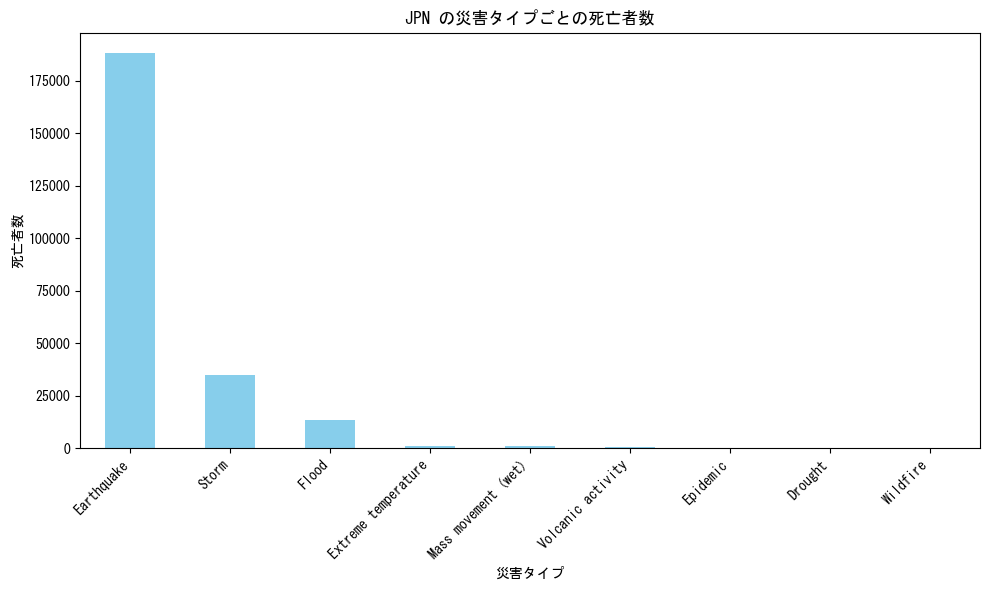

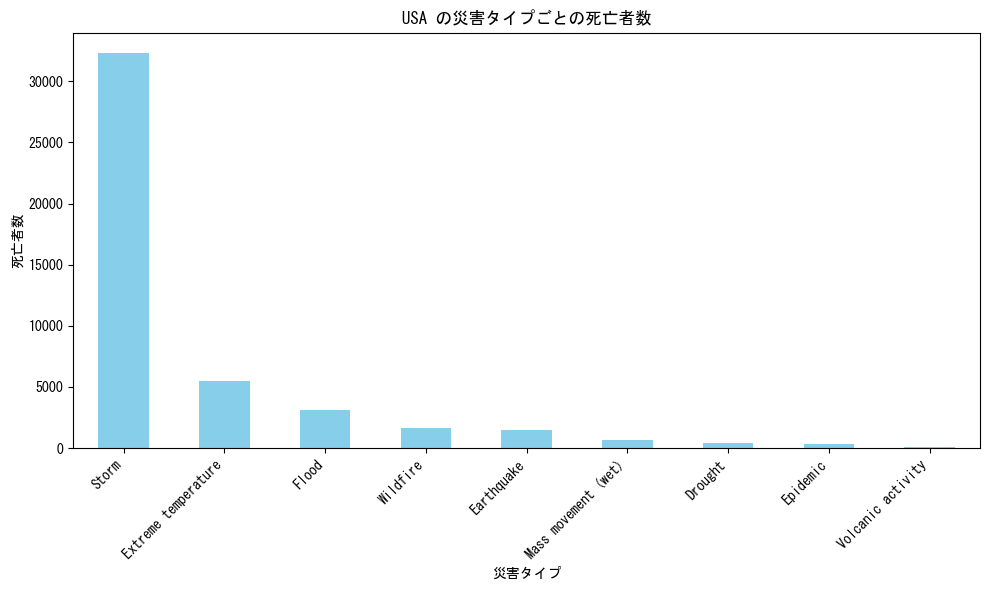

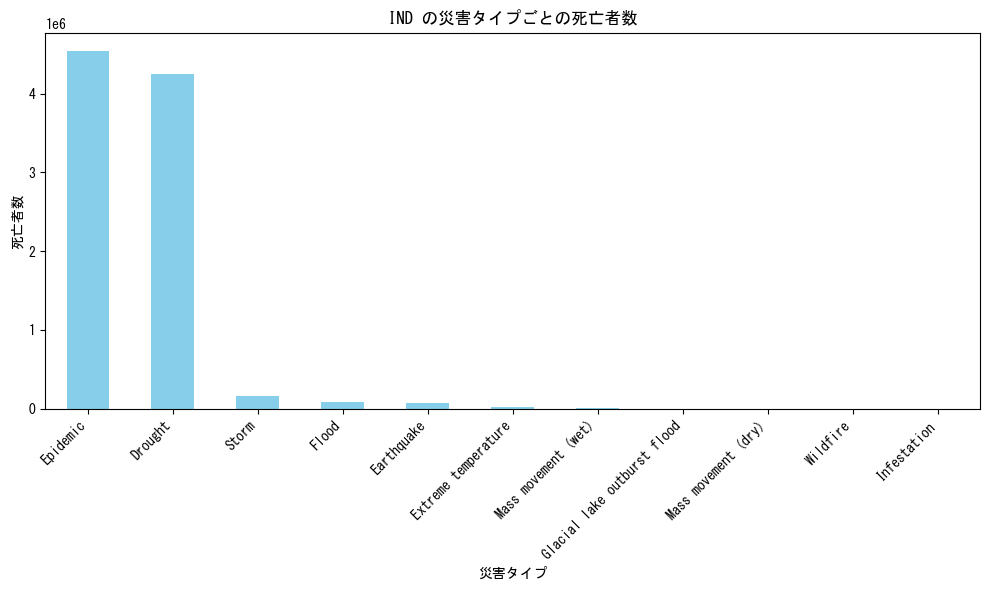

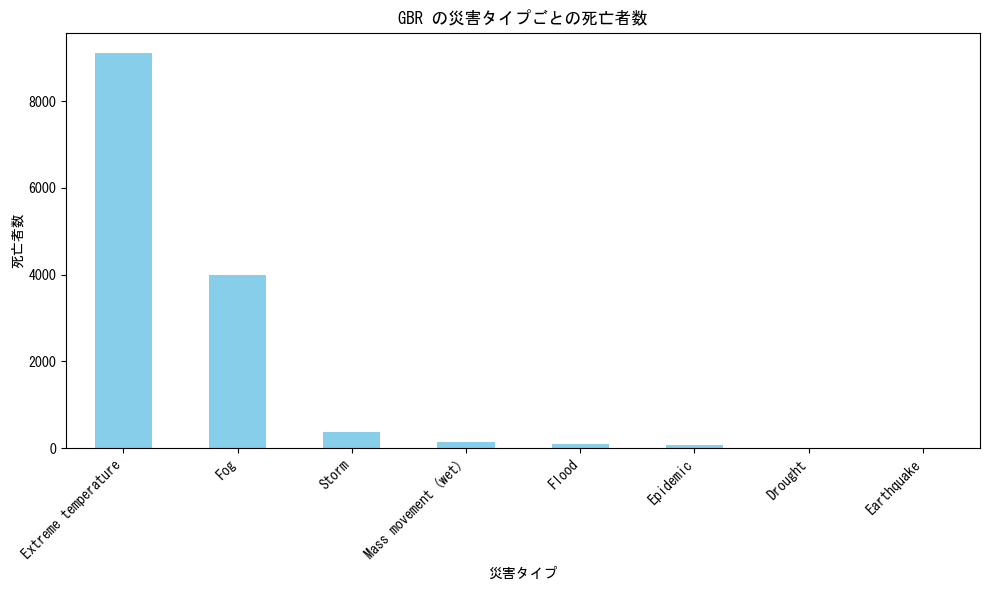

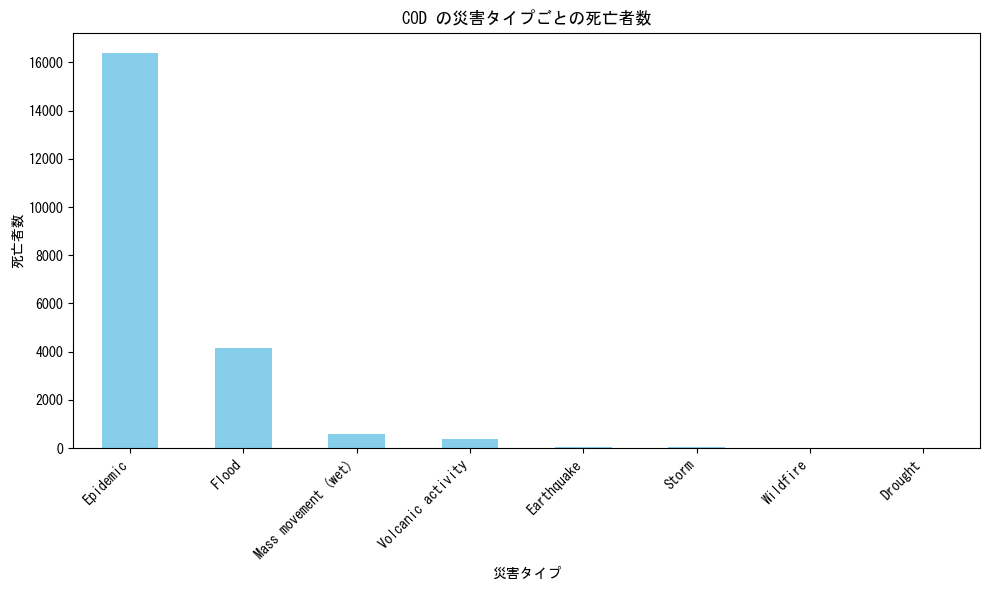

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語対応

def plot_multiple_countries_disaster_deaths(csv_file, iso_codes):
    """
    複数の国の災害タイプごとの死亡者数を順番に棒グラフで表示する
    
    Parameters:
    csv_file: str - 災害データCSVファイル
    iso_codes: list - ISO国コードのリスト
    """
    # CSVデータ読み込み
    df = pd.read_csv(csv_file)
    
    for iso in iso_codes:
        country_df = df[df['ISO'] == iso]
        
        if country_df.empty:
            print(f"{iso} のデータが見つかりません")
            continue
        
        deaths_by_type = country_df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
        
        plt.figure(figsize=(10,6))
        deaths_by_type.plot(kind='bar', color='skyblue')
        plt.title(f"{iso} の災害タイプごとの死亡者数")
        plt.xlabel("災害タイプ")
        plt.ylabel("死亡者数")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# 使用例
csv_file = "emdat.csv"
iso_codes = ['JPN', 'USA', 'IND', 'GBR', 'COD']  # 日本、アメリカ、インド、イギリス、コンゴ
plot_multiple_countries_disaster_deaths(csv_file, iso_codes)


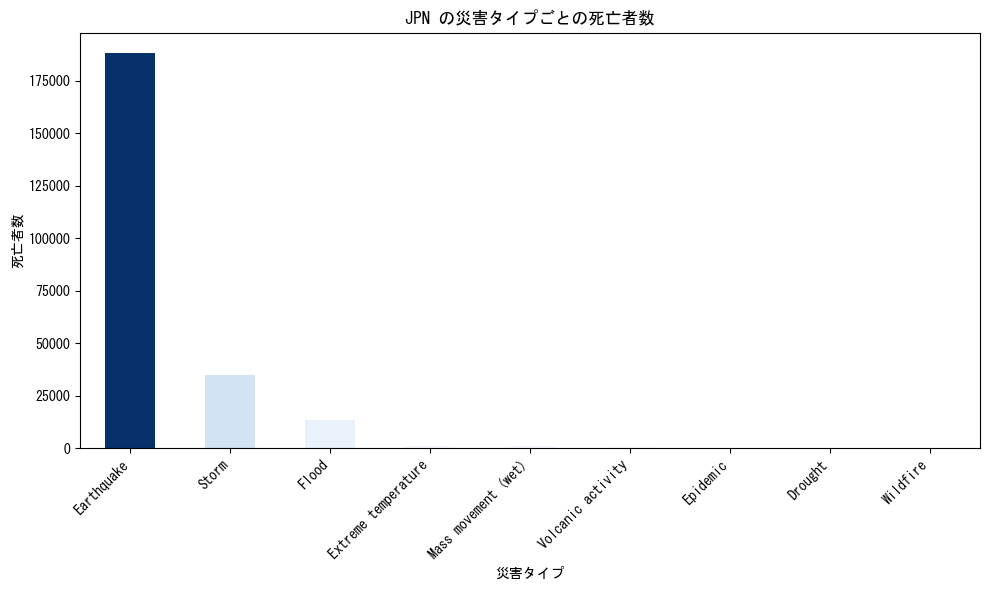

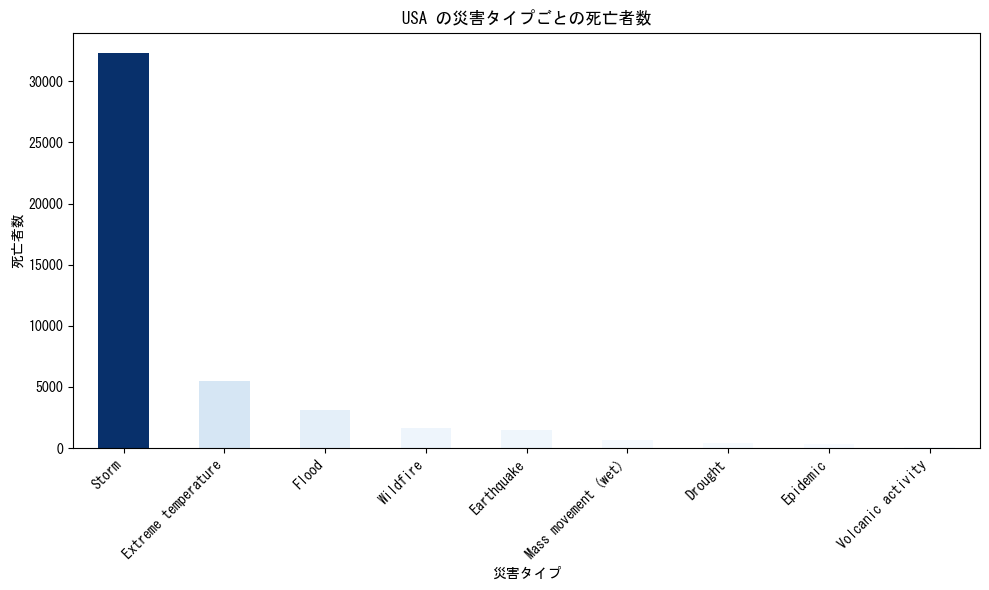

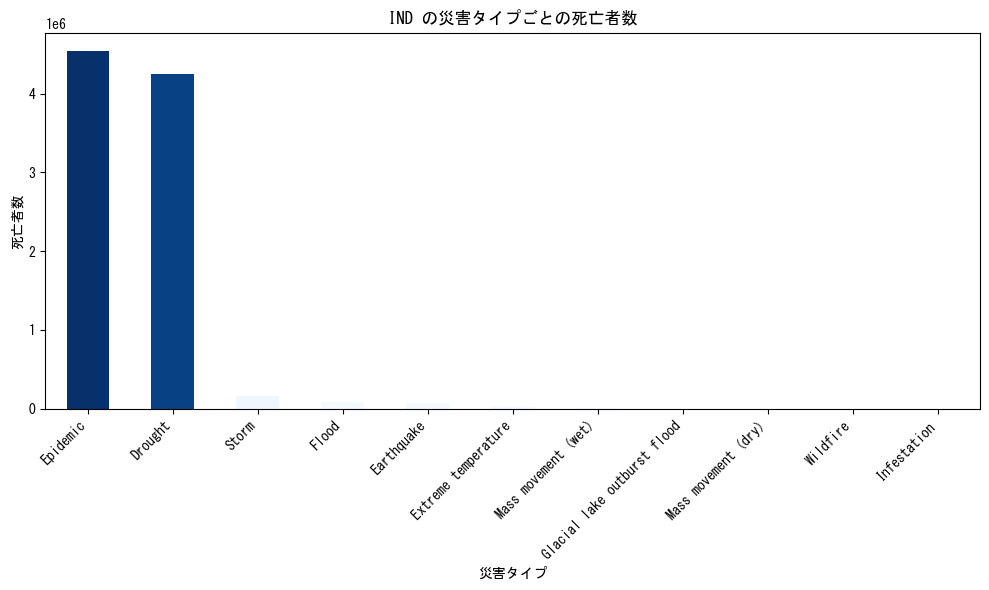

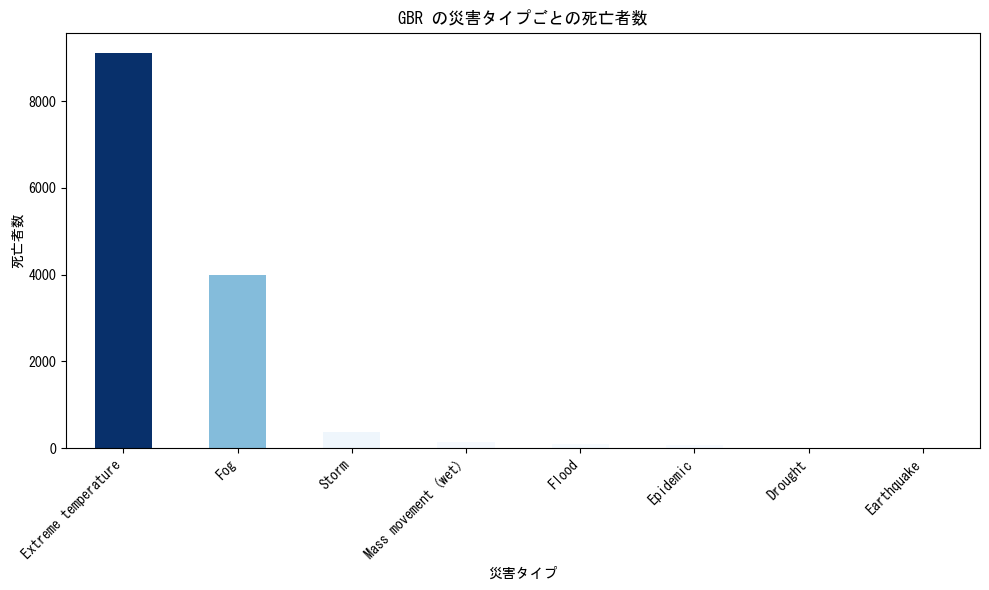

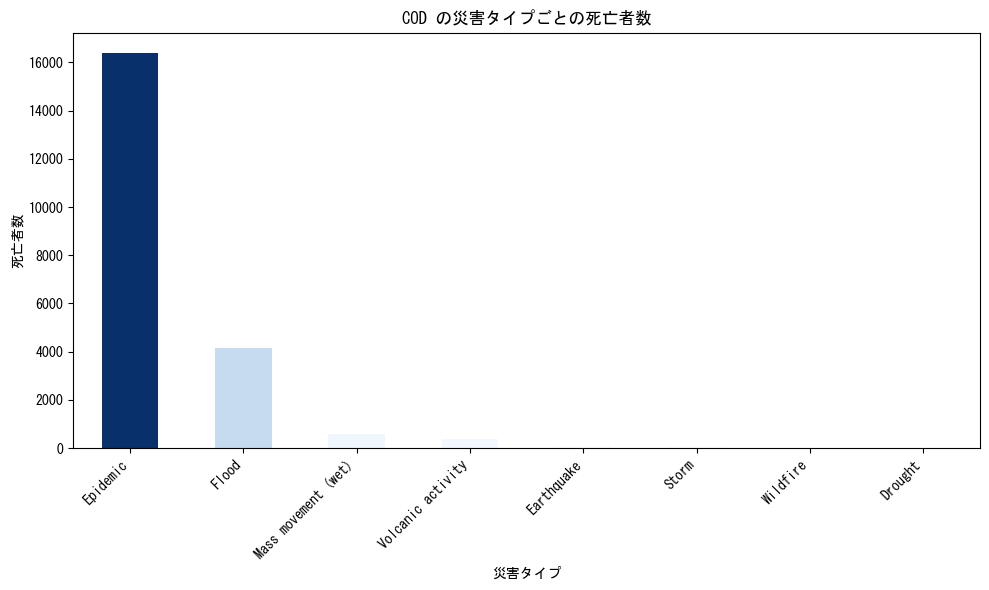

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語対応

def plot_multiple_countries_disaster_deaths_gradient(csv_file, iso_codes):
    """
    複数の国の災害タイプごとの死亡者数を棒グラフで表示し、
    最大値を濃い青にしたグラデーションカラーを適用
    
    Parameters:
    csv_file: str - 災害データCSVファイル
    iso_codes: list - ISO国コードのリスト
    """
    df = pd.read_csv(csv_file)
    
    for iso in iso_codes:
        country_df = df[df['ISO'] == iso]
        
        if country_df.empty:
            print(f"{iso} のデータが見つかりません")
            continue
        
        deaths_by_type = country_df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
        
        # グラデーションカラー作成
        norm = mcolors.Normalize(vmin=deaths_by_type.min(), vmax=deaths_by_type.max())
        cmap = plt.cm.Blues  # 青系カラーマップ
        colors = [cmap(norm(value)) for value in deaths_by_type]
        
        # 棒グラフ作成
        plt.figure(figsize=(10,6))
        deaths_by_type.plot(kind='bar', color=colors)
        plt.title(f"{iso} の災害タイプごとの死亡者数")
        plt.xlabel("災害タイプ")
        plt.ylabel("死亡者数")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# 使用例
csv_file = "emdat.csv"
iso_codes = ['JPN', 'USA', 'IND', 'GBR', 'COD']
plot_multiple_countries_disaster_deaths_gradient(csv_file, iso_codes)
